In [1]:
!pip install pycaret

     |████████████████████████████████| 256kB 6.8MB/s 
     |████████████████████████████████| 1.6MB 7.1MB/s 
     |████████████████████████████████| 102kB 10.5MB/s 
     |████████████████████████████████| 6.8MB 20.8MB/s 
     |████████████████████████████████| 1.8MB 54.0MB/s 
     |████████████████████████████████| 14.2MB 60.1MB/s 
     |████████████████████████████████| 157.5MB 37kB/s 
     |████████████████████████████████| 174kB 60.9MB/s 
     |████████████████████████████████| 276kB 58.9MB/s 
     |████████████████████████████████| 245kB 61.6MB/s 
     |████████████████████████████████| 65.8MB 73kB/s 
     |████████████████████████████████| 2.1MB 64.0MB/s 
     |████████████████████████████████| 81kB 12.1MB/s 
     |████████████████████████████████| 348kB 82.7MB/s 
     |████████████████████████████████| 61kB 8.7MB/s 
     |████████████████████████████████| 1.1MB 55.3MB/s 
     |████████████████████████████████| 153kB 61.8MB/s 
     |████████████████████████████████| 163kB 56.6MB/

In [2]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
from tqdm.auto import tqdm
import numpy as np
from pycaret.classification import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

Mounted at /content/drive


In [3]:
train_err = pd.read_csv('/content/drive/MyDrive/Jupyter/Dacon/Dacon/data/edas/train_err2.csv')
train_qui = pd.read_csv('/content/drive/MyDrive/Jupyter/Dacon/Dacon/data/edas/train_quility2.csv')
train_prob = pd.read_csv('/content/drive/MyDrive/Jupyter/Dacon/Dacon/data/edas/train_prob2.csv')

test_err = pd.read_csv('/content/drive/MyDrive/Jupyter/Dacon/Dacon/data/test_err_data.csv')
test_qui = pd.read_csv('/content/drive/MyDrive/Jupyter/Dacon/Dacon/data/test_quality_data.csv')

In [41]:
train_err[train_err['user_id'] == 10000]

,user_id,model_nm,fwver,errtype,errcode,time
0,10000,model_3,05.15.2138,15,1,01일02:56:16
1,10000,model_3,05.15.2138,12,1,01일03:03:09
2,10000,model_3,05.15.2138,11,1,01일03:03:09
3,10000,model_3,05.15.2138,16,1,01일05:05:14
4,10000,model_3,05.15.2138,4,0,01일05:05:15
...,...,...,...,...,...,...
312,10000,model_3,05.15.2138,15,1,30일06:16:00
313,10000,model_3,05.15.2138,16,1,30일19:06:52
314,10000,model_3,05.15.2138,4,0,30일19:06:53
315,10000,model_3,05.15.2138,4,0,30일19:07:00


In [4]:
train_qui2 = train_qui.drop(['fwver', 'quality_3', 'quality_4', 'time'], axis = 1)
train_qui2['user_id'] = train_qui2['user_id'] - 10000
test_qui2 = test_qui.drop(['fwver', 'quality_3', 'quality_4', 'time'], axis = 1)
test_qui2['user_id'] = test_qui2['user_id'] - 30000

In [5]:
test_qui2 = test_qui2.replace(',','', regex=True)
test_qui2.iloc[:,1:] = test_qui2.iloc[:,1:].astype(float)

In [66]:
def quality_frequency(data):
  data = data.fillna(-10)
  frequencies = pd.DataFrame()
  ids = list(set(data.user_id.values))
  ids.sort()
  for id in tqdm(ids):
    temp = data[data['user_id'] == id]
    most = pd.DataFrame(temp.value_counts().index[0]).transpose()
    frequencies = pd.concat([frequencies, most], axis = 0)
  frequencies.columns = data.columns
  return frequencies

In [7]:
test_fre = quality_frequency(test_qui2)
train_fre = quality_frequency(train_qui2)

In [67]:
test_fre = quality_frequency(test_qui2)
test_fre

,user_id,quality_0,quality_1,quality_2,quality_5,quality_6,quality_7,quality_8,quality_9,quality_10,quality_11,quality_12
0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,2.0,0.0,0.0
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2556.0,0.0,0.0
0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0
0,3.0,0.0,0.0,0.0,0.0,0.0,93.0,0.0,0.0,1.0,0.0,0.0
0,4.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,2.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
0,14990.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31.0,0.0,0.0
0,14993.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0
0,14994.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,0.0,2.0,-1.0,0.0
0,14996.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0


In [65]:
test_fre

,user_id,quality_0,quality_1,quality_2,quality_5,quality_6,quality_7,quality_8,quality_9,quality_10,quality_11,quality_12
0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,2.0,0.0,0.0
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2556.0,0.0,0.0
0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0
0,3.0,0.0,0.0,0.0,0.0,0.0,93.0,0.0,0.0,1.0,0.0,0.0
0,4.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,2.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
0,14990.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31.0,0.0,0.0
0,14993.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0
0,14994.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,0.0,2.0,-1.0,0.0
0,14996.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0


In [8]:
def err_counts(data):
  lens = max(len(set(data.user_id.values)), 14999)
  id_error = data[['user_id','errtype']].values
  error = np.zeros((lens,42))
  k = data.user_id[0]
  for person_idx, err in tqdm(id_error):
    error[person_idx - k, err - 1] += 1
  dataset = pd.DataFrame(data=error)
  return dataset

In [9]:
train_err_count = err_counts(train_err)

In [10]:
test_err_count = err_counts(test_err)

In [59]:
train_err_count

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41
0,0.0,0.0,8.0,104.0,0.0,1.0,1.0,0.0,0.0,7.0,15.0,16.0,1.0,10.0,59.0,61.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,53.0,1.0,1.0,0.0,0.0,0.0,10.0,11.0,1.0,15.0,151.0,128.0,0.0,4.0,1.0,3.0,1.0,756.0,751.0,5.0,1.0,22.0,0.0,0.0,0.0,0.0,250.0,0.0,10.0,18.0,0.0,1.0,1.0,0.0,0.0,113.0,56.0,1.0
2,0.0,0.0,2.0,132.0,1.0,2.0,1.0,0.0,0.0,1.0,13.0,14.0,1.0,4.0,52.0,52.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,25.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,2.0,1.0,1.0,0.0,0.0,0.0,9.0,9.0,0.0,0.0,52.0,30.0,1.0,0.0,0.0,0.0,0.0,28.0,19.0,0.0,0.0,59.0,0.0,0.0,0.0,0.0,65.0,0.0,8.0,0.0,0.0,1.0,1.0,2.0,0.0,17.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,3.0,4.0,0.0,0.0,0.0,16.0,19.0,3.0,5.0,143.0,91.0,0.0,0.0,0.0,0.0,0.0,140.0,119.0,0.0,0.0,33.0,0.0,0.0,0.0,0.0,176.0,0.0,16.0,0.0,0.0,1.0,1.0,0.0,0.0,4.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,0.0,0.0,0.0,0.0,2.0,5.0,5.0,0.0,0.0,0.0,5.0,10.0,8.0,8.0,26.0,18.0,0.0,0.0,0.0,0.0,0.0,17.0,12.0,0.0,0.0,22.0,0.0,0.0,0.0,0.0,31.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,7.0,4.0
14996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14997,0.0,0.0,0.0,1.0,8.0,1.0,1.0,0.0,0.0,0.0,16.0,18.0,4.0,1.0,181.0,138.0,0.0,0.0,0.0,0.0,0.0,50.0,29.0,0.0,0.0,49.0,0.0,0.0,0.0,0.0,223.0,0.0,16.0,17.0,0.0,1.0,1.0,0.0,0.0,58.0,8.0,5.0
14998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,15.0,0.0,1.0,51.0,12.0,0.0,0.0,0.0,0.0,0.0,7.0,1.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,14.0,0.0,15.0,12.0,0.0,1.0,1.0,0.0,0.0,6.0,0.0,0.0


In [11]:
def errcode_count(data):
  counts = []
  ids = set(data.user_id.values)
  for id in tqdm(ids):
    err_list = []
    errs = data[data.user_id == id].errcode.value_counts()

    first = errs.index[0]
    try:
      second = errs.index[1]
    except:
      second = -1

    err_list.extend([first, second]) #, second, third])
    counts.append(err_list)
  return counts

In [12]:
train_err_code = errcode_count(train_err)
test_err_code = errcode_count(test_err)

In [13]:
train_err_code = pd.DataFrame(train_err_code)
test_err_code = pd.DataFrame(test_err_code)
train_err_code.columns = ['most', 'second']
test_err_code.columns = ['most', 'second']

In [14]:
train_fre2 = train_fre.set_index('user_id')
train_fre2 = train_fre2.astype('str')
test_fre2 = test_fre.set_index('user_id')
test_fre2 = test_fre2.astype('str')

In [15]:
trainset = pd.concat([train_err_count, train_err_code, train_fre2], join='outer', axis = 1)
testset = pd.concat([test_err_count, test_err_code, test_fre2], join='outer', axis = 1)

In [16]:
train_ver = train_err.drop_duplicates(subset='user_id').loc[:,['user_id', 'model_nm', 'fwver']]
train_ver['user_id'] = train_ver['user_id'] - 10000
train_ver = train_ver.set_index('user_id')
test_ver = test_err.drop_duplicates(subset='user_id').loc[:,['user_id', 'model_nm', 'fwver']]
test_ver['user_id'] = test_ver['user_id'] - 30000
test_ver = test_ver.set_index('user_id')

In [17]:
trainset = pd.concat([trainset, train_ver], axis = 1, join = 'outer')
testset = pd.concat([testset, test_ver], axis = 1, join = 'outer')

In [18]:
def reports_count(data, train = 'yes'):
  if train == 'yes':
    k = 10000
  else:
    k = 30000
  errs = pd.DataFrame(data['user_id'].value_counts())
  errs.columns = ['reports_count']
  errs = errs.reset_index()
  errs['index'] = errs['index'] - k
  errs.set_index('index', inplace = True)
  return errs

In [19]:
train_errs = reports_count(train_err, train = 'yes')
test_errs = reports_count(test_err, train = 'no')

In [63]:
test_errs

,reports_count
index,
11285,396478
11591,161516
11369,159418
264,120213
3363,84216
...,...
9675,1
10030,1
11600,1


In [20]:
trainset = pd.concat([trainset, train_errs], axis = 1, join = 'outer')
testset = pd.concat([testset, test_errs], axis = 1, join = 'outer')

In [21]:
trainset

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,most,second,quality_0,quality_1,quality_2,quality_5,quality_6,quality_7,quality_8,quality_9,quality_10,quality_11,quality_12,model_nm,fwver,reports_count
0.0,0.0,0.0,8.0,104.0,0.0,1.0,1.0,0.0,0.0,7.0,15.0,16.0,1.0,10.0,59.0,61.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,model_3,05.15.2138,317
1.0,0.0,0.0,0.0,0.0,53.0,1.0,1.0,0.0,0.0,0.0,10.0,11.0,1.0,15.0,151.0,128.0,0.0,4.0,1.0,3.0,1.0,756.0,751.0,5.0,1.0,22.0,0.0,0.0,0.0,0.0,250.0,0.0,10.0,18.0,0.0,1.0,1.0,0.0,0.0,113.0,56.0,1.0,1,standby,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,model_2,04.33.1185,2365
2.0,0.0,0.0,2.0,132.0,1.0,2.0,1.0,0.0,0.0,1.0,13.0,14.0,1.0,4.0,52.0,52.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,25.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,model_3,05.15.2138,306
3.0,0.0,0.0,0.0,0.0,2.0,1.0,1.0,0.0,0.0,0.0,9.0,9.0,0.0,0.0,52.0,30.0,1.0,0.0,0.0,0.0,0.0,28.0,19.0,0.0,0.0,59.0,0.0,0.0,0.0,0.0,65.0,0.0,8.0,0.0,0.0,1.0,1.0,2.0,0.0,17.0,1.0,0.0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,model_2,04.33.1185,306
4.0,0.0,0.0,0.0,1.0,0.0,3.0,4.0,0.0,0.0,0.0,16.0,19.0,3.0,5.0,143.0,91.0,0.0,0.0,0.0,0.0,0.0,140.0,119.0,0.0,0.0,33.0,0.0,0.0,0.0,0.0,176.0,0.0,16.0,0.0,0.0,1.0,1.0,0.0,0.0,4.0,0.0,2.0,1,connection timeout,0.0,0.0,0.0,0.0,0.0,87.0,0.0,0.0,1.0,0.0,0.0,model_0,04.22.1750,777
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995.0,0.0,0.0,0.0,0.0,2.0,5.0,5.0,0.0,0.0,0.0,5.0,10.0,8.0,8.0,26.0,18.0,0.0,0.0,0.0,0.0,0.0,17.0,12.0,0.0,0.0,22.0,0.0,0.0,0.0,0.0,31.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,7.0,4.0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,model_2,04.33.1261,194
14996.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,model_3,05.15.2138,4
14997.0,0.0,0.0,0.0,1.0,8.0,1.0,1.0,0.0,0.0,0.0,16.0,18.0,4.0,1.0,181.0,138.0,0.0,0.0,0.0,0.0,0.0,50.0,29.0,0.0,0.0,49.0,0.0,0.0,0.0,0.0,223.0,0.0,16.0,17.0,0.0,1.0,1.0,0.0,0.0,58.0,8.0,5.0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0,0.0,0.0,model_0,04.22.1750,826
14998.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,15.0,0.0,1.0,51.0,12.0,0.0,0.0,0.0,0.0,0.0,7.0,1.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,14.0,0.0,15.0,12.0,0.0,1.0,1.0,0.0,0.0,6.0,0.0,0.0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,model_0,04.22.1750,155


In [22]:
problem = np.zeros(15000)
problem[train_prob.user_id.unique()-10000] = 1 
problem = pd.DataFrame(problem, columns = ['Target'])

In [23]:
trainset = pd.concat([trainset, problem], axis = 1)

In [24]:
minmax = MinMaxScaler()

In [25]:
def scaling(data, train = 1):

  if train == 1:
    scl_a = data.iloc[:,:42]
    scl_b = data.iloc[:,-2]
    cat_a = data.iloc[:,42:-2]
    cat_a.fillna('-5', inplace=True)
    scl = pd.concat([scl_a, scl_b], axis = 1)
    scaled = pd.DataFrame(minmax.fit_transform(scl), columns=scl.columns)
    target = data.iloc[:,-1]
    scaled = pd.concat([scaled, cat_a, target], axis = 1)
  else:
    scl_a = data.iloc[:,:42]
    scl_b = data.iloc[:,-1]
    cat_a = data.iloc[:,42:-1]
    cat_a.fillna('-5', inplace=True)
    scl = pd.concat([scl_a, scl_b], axis = 1)
    scaled = pd.DataFrame(minmax.transform(scl), columns=scl.columns)
    scaled = pd.concat([scaled, cat_a], axis = 1)
  return scaled

In [26]:
trainset2 = scaling(trainset, train = 1)
testset2 = scaling(testset, train = 0)

In [27]:
X = trainset2.iloc[:,:-1]
y = trainset2.iloc[:,-1]

In [28]:
X_train, X_valid, Y_train, Y_valid = train_test_split(X, y, test_size=0.30, random_state=42)

In [29]:
X_train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,reports_count,most,second,quality_0,quality_1,quality_2,quality_5,quality_6,quality_7,quality_8,quality_9,quality_10,quality_11,quality_12,model_nm,fwver
11797.0,0.000000,0.000000,0.000000,0.000000,0.056200,0.001114,0.000744,0.0,0.0,0.000387,0.006140,0.006272,0.000343,0.001820,0.074705,0.058824,0.006522,0.00000,0.000000,0.000000,0.000000,0.323758,0.274240,0.000000,0.0,0.223629,0.000000,0.000000,0.0,0.0,0.004731,0.010644,0.142077,0.000162,0.001208,0.000000,0.000000,0.004274,0.0,0.041298,0.000000,0.000000,0.060936,connection timeout,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,0.0,0.0,model_1,04.16.3553
5899.0,0.175439,0.000000,0.000137,0.001634,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.001228,0.001227,0.000000,0.000000,0.126474,0.126797,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.003538,0.003580,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.006445,1,0,-10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,model_4,03.11.1167
9513.0,0.000000,0.000986,0.000000,0.000000,0.000151,0.000000,0.000372,0.0,0.0,0.000000,0.000955,0.000954,0.000000,0.000073,0.012451,0.012418,0.002174,0.00000,0.000000,0.000000,0.000000,0.004390,0.002717,0.000000,0.0,0.118143,0.000000,0.000000,0.0,0.0,0.004279,0.000000,0.038251,0.001942,0.000000,0.000000,0.000000,0.000000,0.0,0.007080,0.050633,0.000000,0.002255,1,0,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,model_0,04.22.1750
1572.0,0.000000,0.000000,0.000137,0.000005,0.000753,0.001114,0.000744,0.0,0.0,0.000000,0.004230,0.004227,0.000172,0.000073,0.024902,0.020915,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.227848,0.000031,0.000031,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000918,1,Q-64002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,model_3,05.15.2138
12995.0,0.000000,0.000000,0.001098,0.000953,0.000753,0.000000,0.000000,0.0,0.0,0.000143,0.006686,0.006681,0.000000,0.000582,0.064220,0.049673,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001745,0.0,0.257384,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.002480,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,model_3,05.15.2138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5191.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.003898,0.002977,0.0,0.0,0.000020,0.005321,0.005727,0.000515,0.001165,0.041940,0.019608,0.008696,0.02439,0.043478,0.043478,0.045455,0.082915,0.059936,0.000000,0.0,0.274262,0.000000,0.000000,0.0,0.0,0.005661,0.000000,0.213115,0.000081,0.004831,0.000000,0.000000,0.000000,0.0,0.025369,0.000745,0.030303,0.015726,1,connection timeout,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,model_1,04.16.3553
13418.0,0.000000,0.000000,0.000000,0.000005,0.000000,0.001670,0.001489,0.0,0.0,0.000000,0.002320,0.002591,0.000515,0.000510,0.067497,0.039869,0.000000,0.00000,0.000000,0.000000,0.000000,0.003450,0.000793,0.000000,0.0,0.172996,0.000000,0.000000,0.0,0.0,0.002897,0.000000,0.092896,0.000324,0.003623,0.333333,0.333333,0.000000,0.0,0.008260,0.000000,0.090909,0.002196,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,model_0,04.22.1750
5390.0,0.000000,0.000000,0.000000,0.000015,0.000151,0.000000,0.000000,0.0,0.0,0.000000,0.004503,0.004500,0.000000,0.000000,0.048493,0.047712,0.000000,0.02439,0.000000,0.043478,0.000000,0.010662,0.004718,0.000000,0.0,0.219409,0.000000,0.000000,0.0,0.0,0.005103,0.000710,0.174863,0.000000,0.001208,0.333333,0.333333,0.000000,0.0,0.008260,0.000000,0.000000,0.003655,1,connection timeout,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,model_1,04.16.3553
8

In [30]:
clf = setup(data = trainset2, target = 'Target') 
best_3 = compare_models(sort = 'Accuracy', n_select = 3)
# blended = blend_models(estimator_list = best_3, fold = 5, method = 'soft')
# pred_holdout = predict_model(blended)
# final_model = finalize_model(blended)
# predictions = predict_model(final_model, data = testset2)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7814,0.7981,0.4725,0.7743,0.5869,0.4499,0.4752
1,0.7862,0.8144,0.4674,0.7995,0.5900,0.4585,0.4887
2,0.7976,0.8208,0.5051,0.8079,0.6215,0.4933,0.5186
3,0.7867,0.8128,0.4848,0.7845,0.5993,0.4648,0.4898
4,0.7889,0.8104,0.4797,0.7976,0.5991,0.4676,0.4955
Mean,0.7882,0.8113,0.4819,0.7928,0.5993,0.4668,0.4936
SD,0.0053,0.0074,0.0130,0.0119,0.0121,0.0146,0.0142


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Voting Classifier,0.7738,0.8037,0.4745,0.7817,0.5905,0.4469,0.4735


In [42]:
catbu = create_model('catboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7762,0.7914,0.4435,0.7806,0.5656,0.4299,0.4611
1,0.7857,0.8090,0.4812,0.7830,0.5961,0.4613,0.4866
2,0.7962,0.8133,0.4870,0.8195,0.6109,0.4847,0.5148
3,0.7876,0.8316,0.4870,0.7850,0.6011,0.4670,0.4917
4,0.8029,0.8248,0.5217,0.8108,0.6349,0.5084,0.5316
5,0.7943,0.8179,0.4696,0.8308,0.6000,0.4755,0.5106
6,0.7990,0.8297,0.4884,0.8325,0.6157,0.4918,0.5239
7,0.7895,0.7976,0.4913,0.7907,0.6061,0.4729,0.4979
8,0.7810,0.8041,0.4711,0.7762,0.5863,0.4492,0.4751
9,0.7950,0.8204,0.4957,0.8066,0.6140,0.4851,0.5117


In [45]:
tuned_cat = tune_model(catbu)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7752,0.7889,0.4522,0.7685,0.5693,0.4308,0.4585
1,0.7857,0.8054,0.4783,0.7857,0.5946,0.4604,0.4866
2,0.7981,0.8065,0.4783,0.8376,0.6089,0.4861,0.5208
3,0.7943,0.8225,0.4899,0.8086,0.6101,0.4816,0.5095
4,0.8095,0.8184,0.5391,0.8194,0.6503,0.5270,0.5488
5,0.8038,0.8218,0.4870,0.8528,0.6199,0.5007,0.5364
6,0.7971,0.8290,0.4942,0.8182,0.6162,0.4895,0.5183
7,0.7848,0.7966,0.4711,0.7913,0.5906,0.4570,0.4853
8,0.7819,0.8042,0.4624,0.7882,0.5829,0.4485,0.4777
9,0.7884,0.8195,0.4754,0.8000,0.5964,0.4653,0.4942


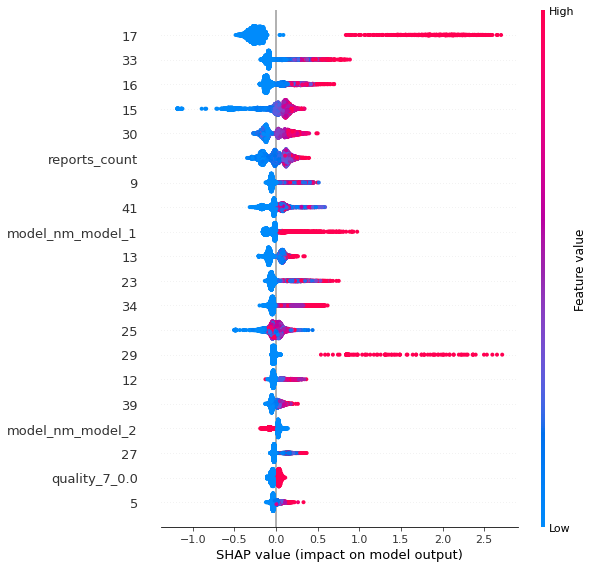

In [46]:
interpret_model(tuned_cat)

In [57]:
testset

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,most,second,quality_0,quality_1,quality_2,quality_5,quality_6,quality_7,quality_8,quality_9,quality_10,quality_11,quality_12,model_nm,fwver,reports_count
0.0,0.0,0.0,0.0,0.0,62.0,1.0,1.0,0.0,0.0,0.0,16.0,16.0,0.0,3.0,67.0,37.0,9.0,3.0,0.0,1.0,0.0,983.0,1308.0,5.0,2.0,32.0,0.0,0.0,0.0,0.0,83.0,2.0,16.0,0.0,1.0,3.0,3.0,0.0,2.0,92.0,0.0,2.0,B-A8002,1,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,2.0,0.0,0.0,model_1,04.16.3553,2750.0
1.0,0.0,0.0,3.0,98.0,3.0,4.0,4.0,0.0,0.0,0.0,12.0,16.0,4.0,6.0,53.0,55.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2556.0,0.0,0.0,model_3,05.15.2138,284.0
2.0,0.0,0.0,0.0,0.0,79.0,2.0,1.0,0.0,0.0,0.0,16.0,16.0,0.0,1.0,173.0,133.0,0.0,0.0,0.0,0.0,0.0,60.0,40.0,2.0,0.0,40.0,0.0,0.0,0.0,0.0,230.0,0.0,16.0,0.0,0.0,1.0,1.0,0.0,14.0,113.0,1.0,2.0,1,B-A8002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,model_0,04.22.1750,941.0
3.0,0.0,0.0,0.0,0.0,107.0,2.0,2.0,0.0,0.0,0.0,4.0,5.0,1.0,7.0,8.0,12.0,0.0,1.0,0.0,1.0,0.0,3.0,2.0,0.0,0.0,5.0,2.0,2.0,0.0,0.0,134.0,0.0,4.0,16.0,3.0,1.0,1.0,0.0,0.0,40.0,8.0,0.0,1,0,0.0,0.0,0.0,0.0,0.0,93.0,0.0,0.0,1.0,0.0,0.0,model_0,04.22.1750,371.0
4.0,0.0,0.0,0.0,2.0,6.0,1.0,1.0,0.0,0.0,0.0,10.0,12.0,1.0,18.0,80.0,67.0,6.0,0.0,0.0,0.0,0.0,10.0,8.0,0.0,0.0,14.0,1.0,1.0,0.0,0.0,332.0,152.0,11.0,6.0,1.0,1.0,1.0,1.0,0.0,48.0,90.0,0.0,1,0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,2.0,0.0,0.0,model_1,04.16.3553,881.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994.0,0.0,0.0,0.0,2.0,12.0,5.0,5.0,0.0,0.0,0.0,16.0,19.0,3.0,9.0,123.0,93.0,12.0,0.0,0.0,0.0,0.0,197.0,204.0,0.0,0.0,31.0,0.0,0.0,0.0,0.0,179.0,2.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,87.0,0.0,1,-1,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,0.0,2.0,-1.0,0.0,model_1,04.16.3553,1115.0
14995.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,14.0,15.0,1.0,4.0,149.0,98.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,183.0,0.0,14.0,1.0,0.0,1.0,1.0,0.0,0.0,12.0,17.0,0.0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,model_0,04.22.1750,515.0
14996.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,12.0,13.0,1.0,3.0,129.0,90.0,2.0,0.0,0.0,0.0,0.0,138.0,165.0,0.0,0.0,48.0,0.0,0.0,0.0,0.0,163.0,0.0,12.0,1118.0,0.0,1.0,1.0,1.0,0.0,329.0,2.0,3.0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,model_0,04.22.1750,2233.0
14997.0,0.0,0.0,0.0,1.0,4.0,2.0,2.0,0.0,0.0,0.0,15.0,16.0,0.0,1.0,73.0,44.0,0.0,1.0,0.0,1.0,0.0,11127.0,13161.0,0.0,3.0,44.0,0.0,0.0,0.0,0.0,78.0,0.0,14.0,0.0,0.0,1.0,1.0,3.0,0.0,30.0,49.0,0.0,1,connection timeout,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,model_0,04.22.1750,24671.0


In [50]:
predictions = predict_model(tuned_cat, data = testset2)

In [51]:
predictions

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,reports_count,most,second,quality_0,quality_1,quality_2,quality_5,quality_6,quality_7,quality_8,quality_9,quality_10,quality_11,quality_12,model_nm,fwver,Label,Score
0.0,0.0,0.0,0.000000,0.000000,0.009342,0.000557,0.000372,0.0,0.0,0.0,0.002183,0.002182,0.000000,0.000218,0.043906,0.024183,0.019565,0.073171,0.0,0.043478,0.0,0.061653,0.049368,0.001745,0.025641,0.135021,0.000000,0.000000,0.0,0.0,0.002206,0.000355,0.087432,0.000000,0.001208,0.500000,0.500000,0.000000,0.002073,0.054277,0.000000,0.060606,0.012373,B-A8002,1,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,2.0,0.0,0.0,model_1,04.16.3553,1.0,0.9212
1.0,0.0,0.0,0.000412,0.000502,0.000452,0.002227,0.001489,0.0,0.0,0.0,0.001637,0.002182,0.000687,0.000437,0.034731,0.035948,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.101266,0.000010,0.000010,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001274,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2556.0,0.0,0.0,model_3,05.15.2138,0.0,0.7946
2.0,0.0,0.0,0.000000,0.000000,0.011903,0.001114,0.000372,0.0,0.0,0.0,0.002183,0.002182,0.000000,0.000073,0.113368,0.086928,0.000000,0.000000,0.0,0.000000,0.0,0.003763,0.001510,0.000698,0.000000,0.168776,0.000000,0.000000,0.0,0.0,0.006113,0.000000,0.087432,0.000000,0.000000,0.166667,0.166667,0.000000,0.014508,0.066667,0.000745,0.060606,0.004231,1,B-A8002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,model_0,04.22.1750,0.0,0.6606
3.0,0.0,0.0,0.000000,0.000000,0.016122,0.001114,0.000744,0.0,0.0,0.0,0.000546,0.000682,0.000172,0.000510,0.005242,0.007843,0.000000,0.024390,0.0,0.043478,0.0,0.000188,0.000075,0.000000,0.000000,0.021097,0.000021,0.000021,0.0,0.0,0.003561,0.000000,0.021858,0.001295,0.003623,0.166667,0.166667,0.000000,0.000000,0.023599,0.005957,0.000000,0.001665,1,0,0.0,0.0,0.0,0.0,0.0,93.0,0.0,0.0,1.0,0.0,0.0,model_0,04.22.1750,1.0,0.7968
4.0,0.0,0.0,0.000000,0.000010,0.000904,0.000557,0.000372,0.0,0.0,0.0,0.001364,0.001636,0.000172,0.001310,0.052425,0.043791,0.013043,0.000000,0.0,0.000000,0.0,0.000627,0.000302,0.000000,0.000000,0.059072,0.000010,0.000010,0.0,0.0,0.008824,0.026965,0.060109,0.000486,0.001208,0.166667,0.166667,0.004274,0.000000,0.028319,0.067014,0.000000,0.003961,1,0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,2.0,0.0,0.0,model_1,04.16.3553,1.0,0.6782
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994.0,0.0,0.0,0.000000,0.000010,0.001808,0.002784,0.001861,0.0,0.0,0.0,0.002183,0.002591,0.000515,0.000655,0.080603,0.060784,0.026087,0.000000,0.0,0.000000,0.0,0.012356,0.007700,0.000000,0.000000,0.130802,0.000000,0.000000,0.0,0.0,0.004757,0.000355,0.087432,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.058997,0.064780,0.000000,0.005014,1,-1,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,0.0,2.0,-1.0,0.0,model_1,04.16.3553,0.0,0.6954
14995.0,0.0,0.0,0.000000,0.000000,0.000000,0.001114,0.000744,0.0,0.0,0.0,0.001910,0.002045,0.000172,0.000291,0.097641,0.064052,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.004219,0.000000,0.000000,0.0,0.0,0.004864,0.000000,0.076503,0.000081,0.000000,0.166667,0.166667,0.000000,0.000000,0.007080,0.012658,0.000000,0.002313,1,0,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,model_0,04.22.1750,0.0,0.7167
14996.0,0.0,0.0,0.000000,0.000000,0.000000,0.000557,0.000372,0.0,0.0,0.0,0.001637,0.001773,0.000172,0.000218,0.084535,0.058824,0.004348,0.000000,0.0,0.000000,0.0,0.008655,0.006228,0.000000,0.000000,0.202532,0.000000,0.000000,0.0,0.0,0.004332,0.000000,0.065574,0.090482,0.000000,0.166667,0.166667,0.004274,0.000000,0.194100,0.001489,0.090909,0.010046,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,model_0,04.22.1750,0.0,0.5681
14997.0,0.0,0.0,0.000000,0.000005,0.000603,0.001114,0.000

In [52]:
x = []
for i in range(len(predictions['Score'])):
  if predictions['Label'][i] =='1.0':
    x.append(predictions['Score'][i])
  else:
    x.append(1-predictions['Score'][i])

In [53]:
sample_submssion = pd.read_csv('/content/drive/MyDrive/Jupyter/Dacon/Dacon/data/sample_submission.csv')
sample_submssion['problem'] = x
sample_submssion

,user_id,problem
0,30000,0.9212
1,30001,0.2054
2,30002,0.3394
3,30003,0.7968
4,30004,0.6782
...,...,...
14994,44994,0.3046
14995,44995,0.2833
14996,44996,0.4319
14997,44997,0.8772


In [54]:
sample_submssion.to_csv('sample_submssion.csv', index = False)
!cp sample_submssion.csv "drive/My Drive/"